### Masive Data Lab Activities

Description : Read and Cleaning Data Sensor BMP280 
File        : T-BMP280-measures.csv 
              P-BMP280-measures.csv
              
Name        : Yudi Aditya

In [1]:
import pandas as pd
import numpy as np

### 1. Temperature File (T-BMP280)

In [2]:
# Reading T-DHT22 file
df1 = pd.read_csv('../data/raw/measures/T-BMP280-measures.csv', parse_dates = ['time'])
df1.head()

,sensor,value,time
0,T-BMP280,26.43,2017-12-22 10:52:59
1,T-BMP280,26.43,2017-12-22 10:53:02
2,T-BMP280,26.44,2017-12-22 10:53:05
3,T-BMP280,26.44,2017-12-22 10:53:08
4,T-BMP280,26.42,2017-12-22 10:53:11


In [3]:
type(df1.time[0])

pandas._libs.tslibs.timestamps.Timestamp

In [4]:
# Get General Information regarding data frame
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422795 entries, 0 to 1422794
Data columns (total 3 columns):
sensor    1422795 non-null object
value     1422795 non-null float64
time      1422795 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 32.6+ MB


From information above, the data frame has 1422795 rows and 3 columns. Each column has 1422795 data, there is no missing data. 

In [5]:
# Get sensor's description 
df1.sensor.value_counts()

T-BMP280    1422795
Name: sensor, dtype: int64

In [6]:
# This data has only one sensor, I drop sensor column and rename column value to T_BMP280
new_df1 = df1.drop(['sensor'], axis='columns') 
new_df1.rename(columns= {'value' : 'T_BMP280'}, inplace = True )
new_df1.head()

,T_BMP280,time
0,26.43,2017-12-22 10:52:59
1,26.43,2017-12-22 10:53:02
2,26.44,2017-12-22 10:53:05
3,26.44,2017-12-22 10:53:08
4,26.42,2017-12-22 10:53:11


In [7]:
# Count missing data in each column
new_df1.isnull().sum()

T_BMP280    0
time        0
dtype: int64

In [8]:
#Get statistical information
new_df1.describe()

,T_BMP280
count,1.422795e+06
mean,2.224838e+01
std,2.619527e+00
min,1.568000e+01
25%,2.096000e+01
50%,2.253000e+01
75%,2.408000e+01
max,2.899000e+01


File T-DHT22-measures.csv doesn't have any problem. There's no missing data and each column has a same format.

### 2. Humidity File (P-BMP280)

In [9]:
# Reading P-BMP280 file
df2 = pd.read_csv('../data/raw/measures/P-BMP280-measures.csv', parse_dates = ['time'])
df2.head()

,sensor,value,time
0,P-BMP280,1035.56,2017-12-22 10:52:59
1,P-BMP280,1035.55,2017-12-22 10:53:02
2,P-BMP280,1035.54,2017-12-22 10:53:05
3,P-BMP280,1035.54,2017-12-22 10:53:08
4,P-BMP280,1035.53,2017-12-22 10:53:11


In [10]:
type(df2.time[0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
# Get General Information regarding data frame
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422788 entries, 0 to 1422787
Data columns (total 3 columns):
sensor    1422788 non-null object
value     1422788 non-null float64
time      1422788 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 32.6+ MB


From information above, the data frame has 1422788 rows and 3 columns. Each column has 1422788 data, there is no missing data.

In [12]:
# Get General Information regarding data frame
df2.sensor.value_counts()

P-BMP280    1422788
Name: sensor, dtype: int64

In [13]:
# This data has only one sensor, I drop sensor column and rename column value to P-BMP280
new_df2 = df2.drop(['sensor'], axis='columns') 
new_df2.rename(columns= {'value' : 'P_BMP280'}, inplace = True )
new_df2.head()

,P_BMP280,time
0,1035.56,2017-12-22 10:52:59
1,1035.55,2017-12-22 10:53:02
2,1035.54,2017-12-22 10:53:05
3,1035.54,2017-12-22 10:53:08
4,1035.53,2017-12-22 10:53:11


In [14]:
# Count missing data in each column
new_df2.isnull().sum()

P_BMP280    0
time        0
dtype: int64

File P_BMP280-measures.csv doesn't have any problem. There's no missing data and each column has a same format.

### 3. Merge temperature and humidity data frame

In this section, I'm going to merge two dataframes into one data frame base on the time. After merging two data frames probably founded missing data either on column T_BMP280 or P_BMP280 because there is a difference between time in each data frame. 

In [15]:
# Merge data frame base on time columns
newdf = pd.merge(new_df1, new_df2, on = 'time', how='outer')
# Set time as a index of data frame
newdf.set_index('time', inplace=True)
newdf.head()

,T_BMP280,P_BMP280
time,,
2017-12-22 10:52:59,26.43,1035.56
2017-12-22 10:53:02,26.43,1035.55
2017-12-22 10:53:05,26.44,1035.54
2017-12-22 10:53:08,26.44,1035.54
2017-12-22 10:53:11,26.42,1035.53


In [16]:
# Get general information
newdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1504469 entries, 2017-12-22 10:52:59 to 2018-03-13 11:41:31
Data columns (total 2 columns):
T_BMP280    1422795 non-null float64
P_BMP280    1422788 non-null float64
dtypes: float64(2)
memory usage: 34.4 MB


From information above, the data frame after merging has 1504469 rows. T_BMP280 and P_BMP280 respectively has 1422795 and 1422788 data. In other words, there is missing data in each column. 

In [17]:
# Count missing data in each column
newdf.isnull().sum()

T_BMP280    81674
P_BMP280    81681
dtype: int64

In [18]:
newdf.iloc[110:125]

,T_BMP280,P_BMP280
time,,
2017-12-22 10:59:00,26.43,1035.50
2017-12-22 10:59:03,26.43,1035.50
2017-12-22 10:59:06,26.43,1035.50
2017-12-22 10:59:09,26.44,1035.52
2017-12-22 10:59:12,26.46,1035.52
2017-12-22 10:59:15,26.46,1035.55
2017-12-22 10:59:18,26.48,NaN
2017-12-22 10:59:22,26.48,1035.54
2017-12-22 10:59:25,26.46,1035.51


In this case, I use interpolation base on time to handle missing data. These are the reason. 
1. Either temperature or preasure does not have a significant change over time.
2. The difference of time from one row to the next row is not same. 

In [19]:
# Handling missing data using interpolation
newdf.interpolate(method='time', inplace=True)
newdf.iloc[110:125]

,T_BMP280,P_BMP280
time,,
2017-12-22 10:59:00,26.43,1035.500000
2017-12-22 10:59:03,26.43,1035.500000
2017-12-22 10:59:06,26.43,1035.500000
2017-12-22 10:59:09,26.44,1035.520000
2017-12-22 10:59:12,26.46,1035.520000
2017-12-22 10:59:15,26.46,1035.550000
2017-12-22 10:59:18,26.48,1035.545714
2017-12-22 10:59:22,26.48,1035.540000
2017-12-22 10:59:25,26.46,1035.510000


In [20]:
# Get statistical information of data frame
newdf.describe()

,T_BMP280,P_BMP280
count,1.504469e+06,1.504469e+06
mean,2.223604e+01,1.015579e+03
std,2.631795e+00,1.010362e+01
min,1.568000e+01,9.856200e+02
25%,2.095000e+01,1.008610e+03
50%,2.252800e+01,1.016860e+03
75%,2.409000e+01,1.022490e+03
max,2.899000e+01,1.039050e+03


### 4. Data Visualization

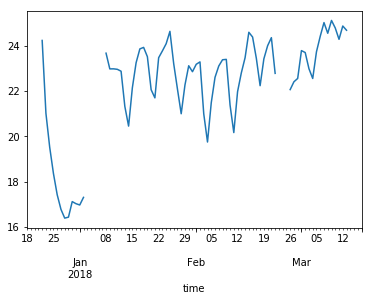

In [21]:
%matplotlib inline
# Visualization the average temperature based on time (day)
newdf.T_BMP280.resample('D').mean().plot()

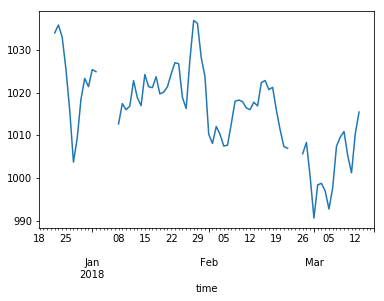

In [22]:
# Visualization the average preasure based on time (day)
newdf.P_BMP280.resample('D').mean().plot()

Note :
There are missing data in temperature and humidity graphs,
it happens because there is no data both in temperature and preasure dataframe 